In [1]:
# 한글 폰트 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

# Matplotlib에 한글 폴트 설정:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 38 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

**→ 런타임 세션다시시작 후 처음부터 다시 진행~!** ←

In [2]:
# 구글 드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!pip install konlpy
!git clone https://github.com/SOMJANG/Mecab-ko-for-Google-Colab.git
%cd Mecab-ko-for-Google-Colab
!bash install_mecab-ko_on_colab_light_220429.sh

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 54.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 488.6/488.6 kB 54.6 MB/s eta 0:00:00
Cloning into 'Mecab-ko-for-Google-Colab'...
remote: Enumerating objects: 138, done.
remote: Counting objects: 100% (47/47), done.
remote: Compressing objects: 100% (38/38), done.
remote: Total 138 (delta 26), reused 22 (delta 8), pack-reused 91
Receiving objects: 100% (138/138), 1.72 MiB | 5.44 MiB/s, done.
Resolving deltas: 100% (65/65), done.
/content/Mecab-ko-for-Google-Colab
Installing konlpy.....
Done
Installing mecab-0.996-ko-0.9.2.tar.gz.....
from https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
--2024-03-16 11:55:06--  https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
Resolving bitbucket.org (bitbucket.org)... 104.192.141.1, 2406:da00:ff00::22c0:3470, 2406:da00:ff00::22c3:9b0a, ...
Connecting to bitbucket.org (bitbucket.org)|104.192.141.1|:443... connected.
HTTP 

In [4]:
# 필요한 라이브러리 설치
!pip install --upgrade pandas
!pip install nltk
!pip install scikit-learn
!pip install matplotlib
!pip install openpyxl

import pandas as pd
import numpy as np
import os
from nltk.tokenize import word_tokenize
from konlpy.tag import Mecab
from nltk.tag import pos_tag
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')  # Matplotlib 한글 폰트 설정 (위에서 설정했던 부분 재사용)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 42.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.4/345.4 kB 43.7 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 0.24.0 requires pandas<2.1.4,>=1.5.0, but you have pandas 2.2.1 which is incompatible.
google-colab 1.0.0 requires pandas==1.5.3, but you have pandas 2.2.1 which is incompatible.


In [5]:
import nltk
nltk.download('stopwords')
import nltk
from nltk.corpus import stopwords

# 필요한 NLTK 데이터 다운로드
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [25]:
# 불용어 목록 로드
stopword_df = pd.read_excel('/content/drive/MyDrive/1_24data/stopwords.xlsx')
korean_stopwords = stopword_df['Stopword'].tolist()

# NLTK 영어 불용어 목록 로드 및 한글 불용어 목록과 결합
english_stopwords = set(stopwords.words('english'))
all_stopwords = set(korean_stopwords) | english_stopwords  # 한글과 영어 불용어 목록 결합

# Mecab 인스턴스 생성
mecab = Mecab()
# Mecab 테스트 (이 부분을 실행하여 Mecab이 제대로 작동하는지 확인)
test_text = "테스트 문장입니다."
print(mecab.pos(test_text))

# 텍스트 데이터 로드
df = pd.read_excel('/content/drive/MyDrive/1_24data/BTS/bts_comments .xls')
text_data = df['댓글내용'].tolist()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[('테스트', 'NNG'), ('문장', 'NNG'), ('입니다', 'VCP+EF'), ('.', 'SF')]


In [26]:
# 명사 추출 함수
def extract_nouns(text):
    if not isinstance(text, str) or not text.strip():
        return ''  # 빈 문자열 반환

    nouns = [noun for noun, tag in mecab.pos(text) if tag in ['NNG', 'NNP']]
    filtered_nouns = [noun for noun in nouns if noun not in all_stopwords and noun.lower() not in all_stopwords]

    return ' '.join(filtered_nouns)

# 명사 추출 전에 각 텍스트를 문자열로 변환하고, 누락된 값이 있을 경우 이를 처리
processed_texts = [extract_nouns(text) for text in text_data]

# processed_texts 리스트 내 각 항목의 타입 확인
for idx, item in enumerate(processed_texts[:5]):
    print(f"Document {idx}: Type: {type(item)}")

# 분석 코드 실행 (이전에 제공된 코드)

# DTM 계산
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(processed_texts)
dtm_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

# TF-IDF 계산
tfidf_vectorizer = TfidfVectorizer()
Y = tfidf_vectorizer.fit_transform(processed_texts)
tfidf_df = pd.DataFrame(Y.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Document 0: Type: <class 'str'>
Document 1: Type: <class 'str'>
Document 2: Type: <class 'str'>
Document 3: Type: <class 'str'>
Document 4: Type: <class 'str'>


**### DTM, TF-IDF 결과 엑셀 출력(코랩 메모리부족으로 다운됨)**


In [27]:
# DTM 결과 저장
try:
    dtm_df.to_excel('/content/drive/MyDrive/1_24data/3_Jung/bts_DTM/coment_DTM.xlsx')
    print("DTM 결과가 성공적으로 저장되었습니다.")
except Exception as e:
    print(f"DTM 저장 중 오류 발생: {e}")

# TF-IDF 결과 저장
try:
    tfidf_df.to_excel('/content/drive/MyDrive/1_24data/3_Jung/bts_DTM/coment_TF-IDF.xlsx')
    print("TF-IDF 결과가 성공적으로 저장되었습니다.")
except Exception as e:
    print(f"TF-IDF 저장 중 오류 발생: {e}")


DTM 저장 중 오류 발생: Cannot save file into a non-existent directory: '/content/drive/MyDrive/1_24data/3_Jung/bts_DTM'
TF-IDF 저장 중 오류 발생: Cannot save file into a non-existent directory: '/content/drive/MyDrive/1_24data/3_Jung/bts_DTM'


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


**### DTM, TF-IDF 상위20개 그래프 생성**

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


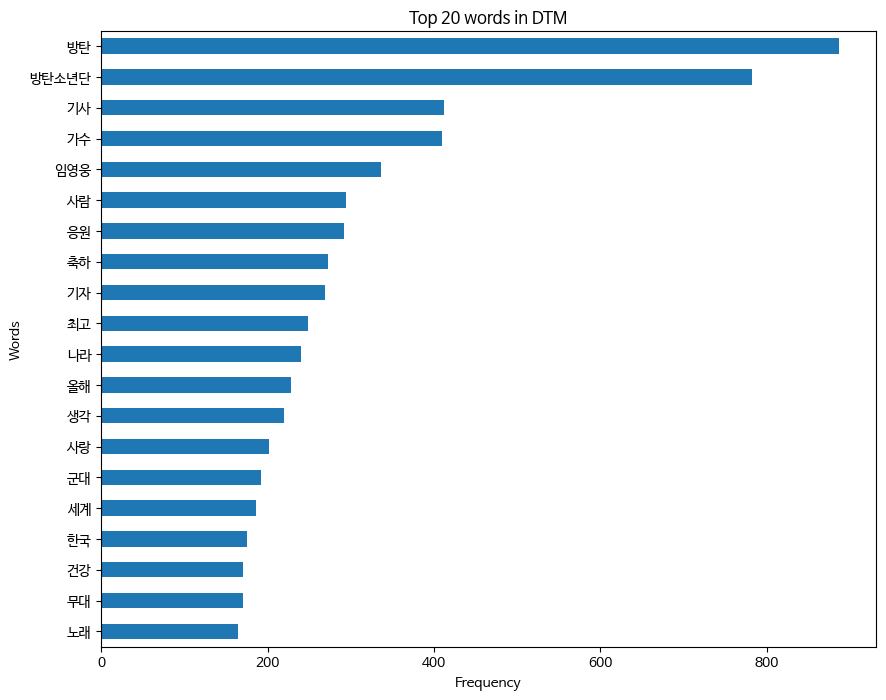

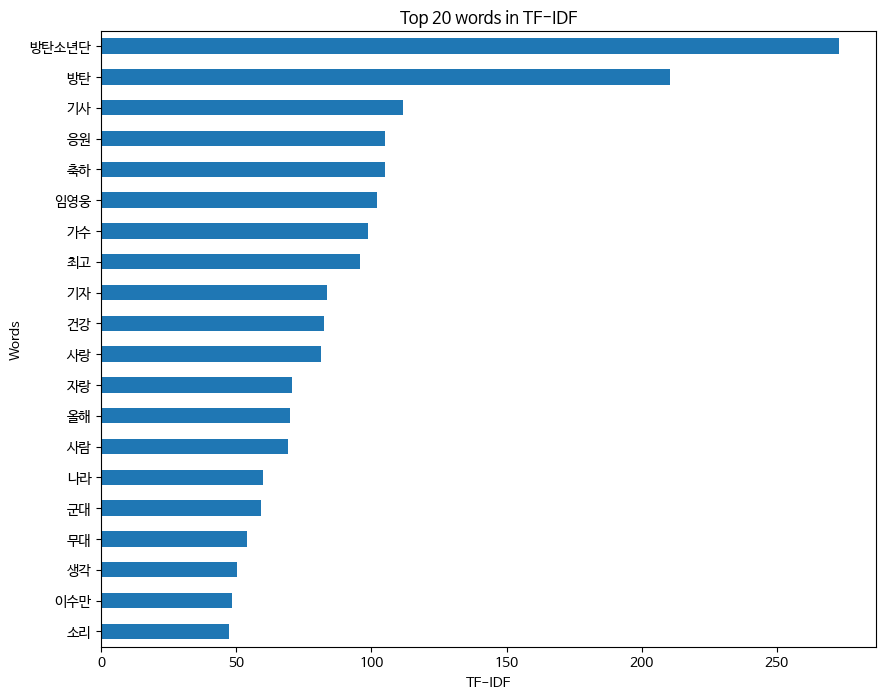

In [28]:
# 상위 20개 단어의 빈도수 그래프 그리기 (DTM 기준) - 가로 막대 그래프
top_n = 20
sum_words_dtm = dtm_df.sum(axis=0).sort_values(ascending=False)[:top_n]
plt.figure(figsize=(10, 8))
sum_words_dtm.plot(kind='barh', title='Top 20 words in DTM')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.gca().invert_yaxis()  # Y축 순서를 뒤집어 상위 단어가 위로 오게 함
plt.show()

# 상위 20개 단어의 TF-IDF 그래프 그리기 - 가로 막대 그래프
sum_words_tfidf = tfidf_df.sum(axis=0).sort_values(ascending=False)[:top_n]
plt.figure(figsize=(10, 8))
sum_words_tfidf.plot(kind='barh', title='Top 20 words in TF-IDF')
plt.xlabel('TF-IDF')
plt.ylabel('Words')
plt.gca().invert_yaxis()  # Y축 순서를 뒤집어 상위 단어가 위로 오게 함
plt.show()

** LDA(vis) 생성**

In [29]:
# 추가 필요한 라이브러리 설치
!pip install gensim
!pip install pyLDAvis

from gensim import corpora, models
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [38]:
# Import the required library
!pip install konlpy

# Import the necessary modules
from konlpy.tag import Mecab

# Initialize the Mecab object
mecab = Mecab()

# Change the line causing the error to:
nouns = [noun for noun, tag in mecab.pos(str(text)) if tag in ['NNG', 'NNP'] and noun not in all_stopwords and noun.lower() not in all_stopwords]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [42]:
# Change the line causing the error to:
nouns = [noun for noun, tag in mecab.pos(str(text)) if tag in ['NNG', 'NNP'] and noun not in all_stopwords and noun.lower() not in all_stopwords]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [44]:
# Change the line causing the error in ipython-input-38-15cab0a10a4b to:
nouns = [noun for noun, tag in mecab.pos(str(text)) if tag in ['NNG', 'NNP'] and noun not in all_stopwords and noun.lower() not in all_stopwords]

# Change the line causing the error in ipython-input-42-15cab0a10a4b to:
nouns = [noun for noun, tag in mecab.pos(str(text)) if tag in ['NNG', 'NNP'] and noun not in all_stopwords and noun.lower() not in all_stopwords]

# Change the line causing the error in ipython-input-43-15cab0a10a4b to:
processed_texts = []
for text in text_data:
    nouns = [noun for noun, tag in mecab.pos(str(text)) if tag in ['NNG', 'NNP'] and noun not in all_stopwords and noun.lower() not in all_stopwords]
    processed_texts.append(nouns)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [46]:
# 텍스트 데이터 로드/content/drive/MyDrive/1_24data/BTS/bts_comments .xls
df = pd.read_excel('/content/drive/MyDrive/1_24data/BTS/bts_comments.xls')
text_data = df['댓글내용'].dropna().tolist()  # NaN 값을 제거하기 위해 dropna()를 사용

# 명사 추출 전에 각 텍스트를 문자열로 변환하고, 누락된 값이 있을 경우 이를 처리
processed_texts = []
for text in text_data:
    nouns = [noun for noun, tag in mecab.pos(str(text)) if tag in ['NNG', 'NNP'] and noun not in all_stopwords and noun.lower() not in all_stopwords]
    processed_texts.append(nouns) # 각 문서를 구성하는 명사의 리스트를 processed_texts에 추가

# 사전(dictionary)과 말뭉치(corpus) 생성
dictionary = corpora.Dictionary(processed_texts)
corpus = [dictionary.doc2bow(text) for text in processed_texts]

# 텍스트 데이터 전처리 결과인 processed_texts를 바탕으로 사전(dictionary)과 말뭉치(corpus) 생성
dictionary = corpora.Dictionary(processed_texts)
corpus = [dictionary.doc2bow(text) for text in processed_texts]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [47]:
# LDA 모델 학습
num_topics = 10  # 추출할 주제의 수 설정
lda_model = models.LdaModel(corpus=corpus, num_topics=num_topics, id2word=dictionary, passes=15)

# LDA 모델 결과 출력 (주제별 상위 단어 출력)
for i, topic in lda_model.show_topics(formatted=True, num_topics=num_topics, num_words=10):
    print(f"Topic {i}: {topic}")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Topic 0: 0.035*"기대" + 0.023*"내년" + 0.022*"활동" + 0.019*"세계" + 0.017*"국민" + 0.017*"코" + 0.013*"중국" + 0.012*"모델" + 0.012*"한정판" + 0.010*"조사"
Topic 1: 0.043*"군대" + 0.026*"방탄" + 0.022*"돈" + 0.021*"면제" + 0.021*"사람" + 0.015*"입대" + 0.014*"미국" + 0.013*"나라" + 0.012*"팝" + 0.011*"시기"
Topic 2: 0.084*"방탄" + 0.017*"화이팅" + 0.017*"연예인" + 0.016*"선양" + 0.016*"국위" + 0.015*"면제" + 0.014*"팬" + 0.011*"생활" + 0.011*"제대" + 0.011*"숟가락"
Topic 3: 0.028*"ㄷ" + 0.021*"인물" + 0.019*"효과" + 0.018*"경제" + 0.017*"솔로" + 0.015*"나라" + 0.015*"저작" + 0.013*"조작" + 0.013*"문재인" + 0.012*"춤"
Topic 4: 0.039*"한국" + 0.023*"가수" + 0.021*"방탄" + 0.021*"일본" + 0.014*"수준" + 0.014*"빅" + 0.013*"생각" + 0.013*"지금" + 0.012*"세계" + 0.012*"글"
Topic 5: 0.061*"임영웅" + 0.058*"가수" + 0.055*"축하" + 0.035*"응원" + 0.033*"올해" + 0.030*"폰" + 0.023*"최고" + 0.021*"방탄" + 0.020*"노래" + 0.014*"위로"
Topic 6: 0.031*"이수만" + 0.027*"소리" + 0.026*"정국" + 0.023*"방탄" + 0.017*"방시혁" + 0.016*"시작" + 0.014*"남" + 0.011*"승승장구" + 0.010*"위" + 0.010*"실력"
Topic 7: 0.052*"사람" + 0.038*"백신" + 0.023*"

**### 위의 LDA결과를 엑셀로저장**

In [48]:
# 필요한 라이브러리 임포트
from openpyxl.styles import Alignment
from openpyxl import load_workbook

# LDA 모델 결과를 저장할 데이터 프레임을 준비합니다.
columns = ['Topic'] + ['Word', 'Probability'] * 10
lda_results_df = pd.DataFrame(columns=columns)

# LDA 모델의 결과를 처리합니다.
for i, topic in lda_model.show_topics(formatted=False, num_topics=num_topics, num_words=10):
    topic_details = [f"Topic {i}"] + [item for sublist in topic for item in sublist]
    lda_results_df.loc[i] = topic_details

# 엑셀 파일로 결과를 저장합니다.
output_filepath = '/content/drive/MyDrive/1_24data/3_Jung/bts_DTM_LDA/lda_topics_formatted.xlsx'
lda_results_df.to_excel(output_filepath, index=False)

# 저장된 엑셀 파일을 openpyxl로 불러옵니다.
wb = load_workbook(output_filepath)
ws = wb.active

# 모든 셀에 대해 정렬을 설정합니다.
for row in ws.iter_rows(min_row=2, max_col=ws.max_column, max_row=ws.max_row):
    for cell in row:
        if (cell.column + 1) % 2 == 0:  # 확률 열인 경우 (짝수 열)
            cell.alignment = Alignment(horizontal='left')
        else:  # 단어 열인 경우 (홀수 열)
            cell.alignment = Alignment(horizontal='right')

# 서식이 적용된 파일을 다시 저장합니다.
wb.save(output_filepath)

print(f"LDA 모델 결과가 성공적으로 저장되었습니다: {output_filepath}")

LDA 모델 결과가 성공적으로 저장되었습니다: /content/drive/MyDrive/1_24data/3_Jung/bts_DTM_LDA/lda_topics_formatted.xlsx


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


**### LDAvis 시각화**

In [49]:
import pyLDAvis.gensim_models as gensimvis

# LDA 모델 시각화 준비
vis = gensimvis.prepare(lda_model, corpus, dictionary)

# 시각화 결과 표시
pyLDAvis.display(vis)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


**### LDAvis html저장**

In [20]:
# 시각화 준비
lda_vis = gensimvis.prepare(lda_model, corpus, dictionary)
# 시각화 결과 HTML 파일로 저장
pyLDAvis.save_html(lda_vis, '/content/drive/MyDrive/1_24data/3_Jung/bts_DTM_LDA/lda_visualization.html')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
